<a href="https://colab.research.google.com/github/Usman-12478/Twitter-Sentiment-Analysis-Complete-Project/blob/main/Project_3_%7C_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
! kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 98% 79.0M/80.9M [00:04<00:00, 22.2MB/s]
100% 80.9M/80.9M [00:04<00:00, 17.1MB/s]


# **Importing Libraries**

In [ ]:
# General Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
plt.style.use('ggplot')

# Machine Learnings Libraries
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import string
from nltk.tokenize import RegexpTokenizer


# Deep Learning Libraries
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Activation, Dropout, Dense, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import sequence

In [ ]:
df = pd.read_csv('', encoding = 'ISO-8859-1')
df.columns = ['Label', 'Time', 'Date', 'Query', 'Username', 'Text']

In [ ]:
df.head()

,Label,Time,Date,Query,Username,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


# **Exploratory Data Analysis**

In [ ]:
df.shape

(1599999, 6)

In [ ]:
df.info

<bound method DataFrame.info of          Label        Time                          Date     Query  \
0            0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1            0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2            0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3            0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4            0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...        ...         ...                           ...       ...   
1599994      4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995      4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996      4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997      4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998      4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                Username                                               Text  
0          scotthamilton  is upset that he can't update his Facebook by ...  
1               mattycus  @Kenichan I dived many times for the ball. Man...  
2                ElleCTF    my whole body feels itchy and like its on fire   
3                 Karoli  @nationwideclass no, it's not behaving at all....  
4               joy_wolf                      @Kwesidei not the whole crew   
...                  ...                                                ...  
1599994  AmandaMarie1028  Just woke up. Having no school is the best fee...  
1599995      TheWDBoards  TheWDB.com - Very cool to hear old Walt interv...  
1599996           bpbabe  Are you ready for your MoJo Makeover? Ask me f...  
1599997     tinydiamondz  Happy 38th Birthday to my boo of alll time!!! ...  
1599998   RyanTrevMorris  happy #charitytuesday @theNSPCC @SparksCharity...  

[1599999 rows x 6 columns]>

In [ ]:
print("Length of Dataset:",len(df))

Length of Dataset: 1599999


In [ ]:
df.dtypes

,0
Label,int64
Time,int64
Date,object
Query,object
Username,object
Text,object


In [ ]:
print('The Numbers of Columns in our dataset', len(df.columns))
print('The Numbers of Rows in our dataset', len(df))

The Numbers of Columns in our dataset 6
The Numbers of Rows in our dataset 1599999


**Selecting Text and Label Columns from Dataset**

In [ ]:
df = df[['Text', 'Label']]

**Assigning Positive Sentiment 4 To 1**

In [ ]:
df['Label'][df['Label'] == 4] = 1

**Separating Positive and Negative Tweets**

In [ ]:
df_pos = df[df['Label'] == 1] # Positive
df_neg = df[df['Label'] == 0] # Negative

**Taking One Fourth Data so we can run Our Machine easily**

In [ ]:
df_positive = df_pos.iloc[:int(20000)]
df_negative = df_neg.iloc[:int(20000)]

**Combining Positive and Negative Tweets**

In [ ]:
data = pd.concat([df_positive, df_negative])

In [ ]:
data['Text'].head(5)

,Text
799999,I LOVE @Health4UandPets u guys r the best!!
800000,im meeting up with one of my besties tonight! ...
800001,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,Being sick can be really cheap when it hurts t...
800003,@LovesBrooklyn2 he has that effect on everyone


**Cleaning And Removing StopWords in English**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopword_list = stopwords.words('english')

In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))  # "Retrieve and display a comma-separated list of English stopwords."

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

**Cleaning and Removing The Above Stopwords from the Tweet Text**

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
  words = [word for word in str(text).split() if word not in STOPWORDS]
  return " ".join(words)


In [ ]:
data['Text'] = data['Text'].apply(lambda x: cleaning_stopwords(x))
data['Text'].head()

,Text
799999,I LOVE @Health4UandPets u guys r best!!
800000,im meeting one besties tonight! Cant wait!! - ...
800001,"@DaRealSunisaKim Thanks Twitter add, Sunisa! I..."
800002,Being sick really cheap hurts much eat real fo...
800003,@LovesBrooklyn2 effect everyone


**Cleaning and Removing Punctuation**

In [ ]:
english_punctuation = string.punctuation
punctuation_list = english_punctuation
def cleaning_punctuation(text):
  translator = str.maketrans('', '', punctuation_list)
  return text.translate(translator)

In [ ]:
data['Text'] = data['Text'].apply(lambda x: cleaning_punctuation(x))
data["Text"].tail(3)

,Text
19997,geezi hv READ whole book personality types emb...
19998,I threw sign donnie bent get thingee made sad ...
19999,heather2711 Good thing I find None ones I like...


**Cleaning And Removing Repeating Characters**

In [ ]:
def cleaning_repeating_char(text):
  return re.sub(r'()\1+', r'\1', text)

In [ ]:
data['Text'] = data['Text'].apply(lambda x: cleaning_repeating_char(x))

**Removing Emails**

In [ ]:
def cleaning_emails(text):
  return re.sub('@[^\s]+', '', text)

In [ ]:
data['Text'] = data['Text'].apply(lambda x: cleaning_emails(x))
data['Text'].head(3)

,Text
799999,I LOVE Health4UandPets u guys r best
800000,im meeting one besties tonight Cant wait GIRL...
800001,DaRealSunisaKim Thanks Twitter add Sunisa I go...


**Removing URLs**

In [ ]:
def cleaning_urls(text):
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', text)

In [ ]:
data['Text'] = data['Text'].apply(lambda z: cleaning_urls(z))
data['Text'].head(4)

,Text
799999,I LOVE Health4UandPets u guys r best
800000,im meeting one besties tonight Cant wait GIRL...
800001,DaRealSunisaKim Thanks Twitter add Sunisa I go...
800002,Being sick really cheap hurts much eat real fo...


**Removing Numeric Values**

In [ ]:
def cleaning_numbers(text):
  return re.sub('[0-9]+', '', text)

In [ ]:
data['Text'] = data['Text'].apply(lambda x: cleaning_numbers(x))
data["Text"].tail()

,Text
19995,One day holidays
19996,feeling right hate DAMN HUMPREY
19997,geezi hv READ whole book personality types emb...
19998,I threw sign donnie bent get thingee made sad ...
19999,heather Good thing I find None ones I like com...


**Getting Tokenization Of Tweet Text**

In [ ]:
tokenizer = RegexpTokenizer(r'\w+') # this match one or more words, digits, underscores
data['Text'] = data['Text'].apply(tokenizer.tokenize)
data['Text'].head(2)

,Text
799999,"[I, LOVE, HealthUandPets, u, guys, r, best]"
800000,"[im, meeting, one, besties, tonight, Cant, wai..."


**Applyig Stemming**

In [ ]:
st = nltk.PorterStemmer()

def stemming_on_text(data):
  text = [st.stem(word) for word in data]
  return text

In [ ]:
data['Text'] = data['Text'].apply(lambda x: stemming_on_text(x))

In [ ]:
data['Text'].head()

,Text
799999,"[i, love, healthuandpet, u, guy, r, best]"
800000,"[im, meet, one, besti, tonight, cant, wait, gi..."
800001,"[darealsunisakim, thank, twitter, add, sunisa,..."
800002,"[be, sick, realli, cheap, hurt, much, eat, rea..."
800003,"[lovesbrooklyn, effect, everyon]"


**Applying Lemmatization**

In [ ]:
lm = nltk.WordNetLemmatizer()

def lemmatizer_on_text(data):
  text = [lm.lemmatize(word) for word in data]
  return text

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['Text'] = data['Text'].apply(lambda x: lemmatizer_on_text(x))
data['Text'].head(4)

,Text
799999,"[i, love, healthuandpet, u, guy, r, best]"
800000,"[im, meet, one, besti, tonight, cant, wait, gi..."
800001,"[darealsunisakim, thank, twitter, add, sunisa,..."
800002,"[be, sick, realli, cheap, hurt, much, eat, rea..."


**Labels:**


Labels are the target, like in this project sentiment of tweets are labels.


**Inputs:**

Inputs are the data that we feed into our ML model, and In that project tweets are like inputs.


**Training Data:**

We use training data when we train the models. We feed train data to ML and DL Models so that model can learn from it.


**Validation Data:**

We use Validation Data while training the Model. We use this data to evaluate the model performance that how the model perform on training time.


**Testing Data:**

We use Testing Data after training the model. We use this data to evaluate how the model perform after training. So in that way first we get Predictions from the trained model without giving the labels and then we compare the true label with the predictions and get the performance of Model.

**Separating Input Features and Labels**

In [ ]:
X = data.Text
y = data.Label

**Preparing The Input Feature for Traning**

We Converting the text words into arrays.
\
Max 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive and negative tweets

In [ ]:
max_len = 500 #  We set the maximum length of each sequence to 500.
tok = Tokenizer(num_words = 2000) # The tokenizer extracts the top 2000 most frequent words from the dataset.
tok.fit_on_texts(X)  #  Fit tokenizer to text data X, it will learn the vocabulary and frequency of each word
sequences = tok.texts_to_sequences(X)  #  Convert text to sequences
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)  # Pad sequences to max length

As we can see that total 40000 tweets and 500 words/features

In [ ]:
sequences_matrix.shape

(40000, 500)

**Separating The 70% for Training and 30% for Testing**


As we prepared all the tweets, now we are separating/splitting the data into training and the testing data.

-- 70% will be use for training our model.

-- 30% will be use for testing our mode.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size = 0.3, random_state = 3)


**Step 1:**

-- The Input to model is 500 words because these are the number features/words we extracted above from the text tweets

**Step 2:**

-- Embedding Provides The presentation of words and their relative meanings. Like in this, we are feeding the limit of max words. length of input words and the input of previous layer.

**Step 3:**

-- LSTM (Long Short Term Memory) saves the words and predicts the next word based on the previous words. LSTM is the sequence predictor of next coming word

**Step 4:**

-- Dense Layers reduce the output by getting the input from flatten layer. Dense layer use all the inputs of previous layer neurons and performs calculations and send 256 outputs

**Step 5:**

-- Activation function is a node that is put at the end of all Neural Network Model  or in between Neural Network Layers. The activation function help to decide which neuron should be passed and which neuron should fire. So activation function of node defines the output of that node given an input or set of inputs.

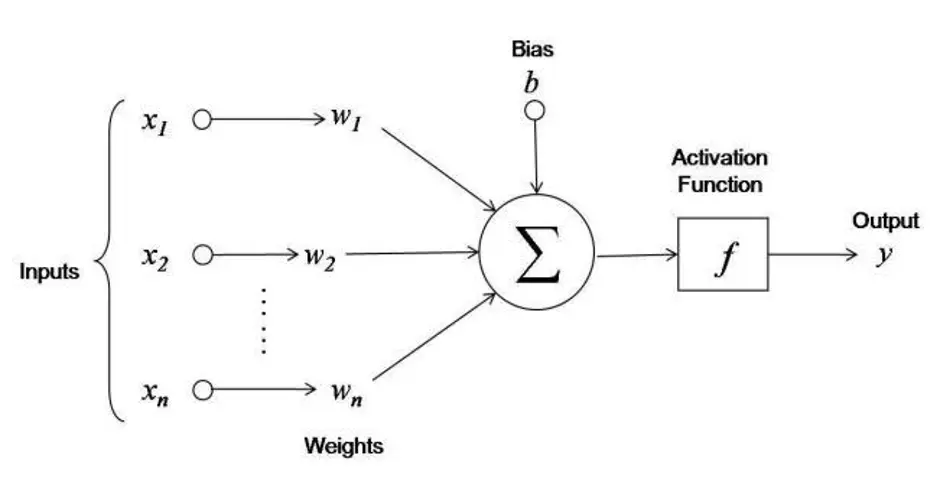

**Step 6:**

-- Dropout layer drop some neurons from previous layer. why we apply this? we apply this to avoid the overfitting problem. In Overfitting, model give a good accuracy on training data but fail on testing data.

In [ ]:
def tensorflow_based_model(): # defined tensorflow_based_model function for training tensorflow based model.
  inputs = Input(name = 'inputs', shape = [max_len]) # step 1
  layer = Embedding(20000, 50, input_length = max_len)(inputs) # step 2
  layer = LSTM(64)(layer) # step 3
  layer = Dense(256, name = 'FC1')(layer) # Step 4
  layer = Activation('relu')(layer) # step 5
  layer = Dropout(0.5)(layer) # step 6
  layer = Dense(1, name = 'out_layer')(layer) # Step 4 again but this time its giving only one output because we need to classify the twweets as positive or negative
  layer = Activation('sigmoid')(layer) # Step 5 but this time activation is sigmoid for only 1 output
  model = Model(inputs = inputs, outputs = layer) # here we are getting the final output  value in the model for classification
  return model  # function returning the value when we call it.

**Model Completion:**

-- First we are calling a model.

-- We are using 2 classes so we set "binary_crossentropy" and if we use more then 2 classes we use "categorical_crossentropy"

-- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order ot reduce the loss. So the learning rate of neural network to reduce the losses is defined by the optimizer

-- We are setting metrics = accuracy because we are going to calculate the percentageof correct predictions on the validation set.

In [ ]:
model = tensorflow_based_model() # here we are calling the function of created model.

model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

**Training and Validating with Parameter Tuning:**

-- We are feeding a training data and getting 10% data for validation from trainig data.

**We set the following Parameters**

-- Batch Size = 80 so that the model takes 80 tweets in each iteration and train them. Batch size is a term used in ML and refers to the number of training examples utilized in one iteration.

-- Epochs = 6 So the model will train on data 6 times, Epoch is a term used in ML and indicates the number of passes of the entire training dataset the Machine Learning algorithm has completed.

-- We can choose batch_size, and epochs as we want, so the good practice is to set some values and train the model if the model does not give good results we can change it and try again for the training of the model. We can repeat this process many time until we will not get the good results and this process called **Parameter Tuning**

In [ ]:
history = model.fit(X_train, y_train, batch_size = 80, epochs = 6, validation_split=0.1, ) # here we are starting the training of model by feeding the training data
print("Training Finished!!!")

Epoch 1/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.5830 - loss: 0.6584 - val_accuracy: 0.7464 - val_loss: 0.5187
Epoch 2/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7489 - loss: 0.5171 - val_accuracy: 0.7518 - val_loss: 0.5091
Epoch 3/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7663 - loss: 0.4889 - val_accuracy: 0.7479 - val_loss: 0.5110
Epoch 4/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.7461 - loss: 0.5217 - val_accuracy: 0.7514 - val_loss: 0.5047
Epoch 5/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7755 - loss: 0.4752 - val_accuracy: 0.7457 - val_loss: 0.5055
Epoch 6/6
315/315 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.7765 - loss: 0.4672 - val_accuracy: 0.7493 - val_loss: 0.5101
Training Finished!!!


**We need to do all the above configurations to train the model. If we don't set all settings then we couldn't get the desired result.**

**Testing The Trained Model on Test Data:**

-- Getting Predictions/Classifying the sentiments (Positive/Negative) on the test data using trained model.

In [ ]:
accr1 = model.evaluate(X_test, y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7409 - loss: 0.5265


**Accuracy:**

-- Accuracy is the number of correctly classifying tweets from all the tweets of positive and negative.

-- For Example, If the trained model classify the 70 tweets correct and 30 tweets wrong from the total 100 tweets then the accuracy score will be 70%.

-- Accuracy = Total Numbers of Correct Predictions/Total Number of Predictions

In [ ]:
print('Test set\n Accuracy: {:0.2f}'.format(accr1[1])) # the accuracy of model on the test data is given below!

Test set
 Accuracy: 0.75


**Geting Predictions of the test data and then we will compare the true labels/classes of the data with predictions.**

-- As the model give probabilites so we are setting a threshold 0.5. More than 0.5 will be positive tweets and lower will be negative tweets.

In [ ]:
y_pred = model.predict(X_test)  # getting predictions on the trained model!
y_pred = (y_pred > 0.5)

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


**Confusion Matrix**

-- These are the evaluation measures to evaluate the model performance.

-- **Dark Blue** boxes are the correct predictions by the trained model and **sky Blue** boxes shows the wrong predictions.

-- 4440 tweets correctly predicted as negative sentiments. 1572 tweets predicted positive sentiment but that were actually negative sentiments.

-- 4503 tweets correctly predicted as positive sentiments.1485 tweets predicted negative sentiments but that were actually positive sentiments.

Confusion Matirx
[[4440 1572]
 [1485 4503]]




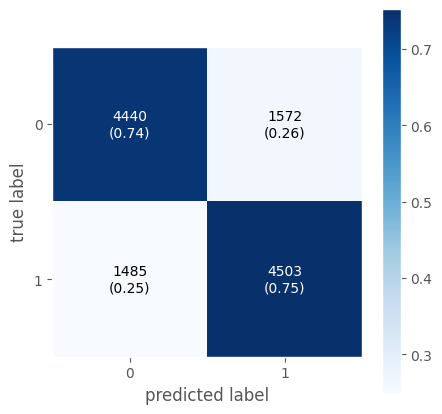

In [ ]:
print('Confusion Matirx')
CR = confusion_matrix(y_test, y_pred)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat = CR, figsize = (5, 5),
                                show_absolute = True,
                                show_normed = True,
                                colorbar = True)
plt.show()


**Roc Curve:**

-- ROC Curve show the performance of Model as well.

-- We can see that the model started from the 0% perdictions and move to true positive predictions that are correct.

-- ROC Curve (Reciever Operating Characteristics Curve) shows the performance of classification model at all the classification threshold. ROC plot two parameters, True Positive Rate (Correct Predictions/classification) and False Positive Rate (Wrong Predictions/classification).

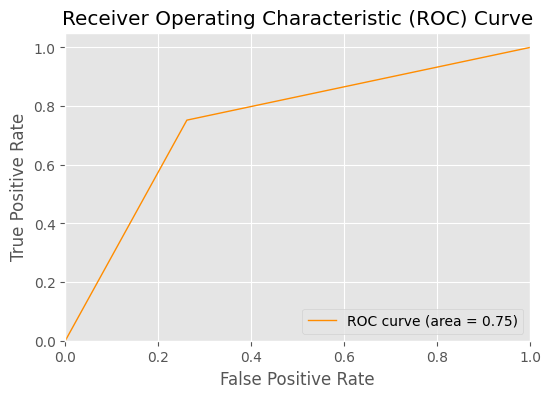

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, color = 'darkorange', lw = 1, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

**Conclusion:**

-- We used Twitter Sentiment Analysis dataset and explore the data with different ways.

-- We have prepared the text data by removing the unnecessary things.

-- We trained model based on tensorflow with all settings.

-- We evaluate the model with different evaluation measures.

-- If you are interested in working on any text-based project, you can apply the same methodology but you will change little settings like names of columns, etc.

-- We have worked on the classification problem and specifically, we call it binary classification which is a tow class classification